In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

In [4]:

# %timeit sirve para evaluar el tiempo de ejecucion
train_entrenamiento = pd.read_csv('train_paso_zx.csv')
test_entrenamiento = pd.read_csv('test_paso_zx.csv')
test = pd.read_csv('trocafone_kaggle_test.csv')

 

In [5]:
len(train_entrenamiento)
#train_entrenamiento = train_entrenamiento.drop('person', 1)

19414

In [6]:
train_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Columns: 106 entries, person to suma_time_last_checkout_y_searchproduct
dtypes: float64(92), int64(13), object(1)
memory usage: 15.7+ MB


In [7]:
train_entrenamiento=train_entrenamiento.drop('person',1)

In [8]:
test_entrenamiento=test_entrenamiento.drop('person',1)

In [9]:
train_entrenamiento.head()

,label,mean_time_between_events,mean_time_between_co,mean_time_between_ch,mean_time_between_vs,mean_time_between_ad,mean_time_between_bl,mean_time_between_st,mean_time_between_se,mean_time_between_sp,...,jueves_vs,viernes_vs,sabado_vs,domingo_vs,multiplicacion_time_last_checkout_y_conversion,suma_time_last_checkout_y_conversion,multiplicacion_time_last_checkout_y_viewproduct,suma_time_last_checkout_y_viewproduct,multiplicacion_time_last_checkout_y_searchproduct,suma_time_last_checkout_y_searchproduct
0,0,4.06,0.00,0.00,4.68,4.20,4.65,0.00,0.00,-1.00,...,4.00,1.00,1.00,2.00,"504,514,699,983.00","1,420,584.00","504,766,199,637.00","1,420,938.00","-710,451.00","710,450.00"
1,0,0.00,-1.00,-1.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,...,0.00,0.00,0.00,0.00,1.00,-2.00,1.00,-2.00,1.00,-2.00
2,0,4.99,-1.00,0.00,5.65,5.93,5.86,-1.00,6.21,6.04,...,0.00,0.00,2.00,5.00,"-174,045.00","174,044.00","30,293,228,430.00","348,099.00","30,351,881,595.00","348,436.00"
3,0,4.31,-1.00,-1.00,5.39,-1.00,2.42,-1.00,0.00,-1.00,...,0.00,2.00,1.00,1.00,1.00,-2.00,"-388,949.00","388,948.00",1.00,-2.00
4,0,1.94,-1.00,2.19,0.00,2.53,-1.00,-1.00,-1.00,-1.00,...,0.00,1.00,0.00,0.00,"-1,124,140.00","1,124,139.00","1,262,631,799,720.00","2,247,338.00","-1,124,140.00","1,124,139.00"


In [10]:
#train_entrenamiento['label'].value_counts()

In [11]:
#df=train_entrenamiento

In [12]:
#df=df.drop(df[df.label.eq(0)].sample(3000).index)
 

In [13]:
#df['label'].value_counts()

In [14]:
#train_entrenamiento=df

In [15]:
#test_entrenamiento = test_entrenamiento.drop('person', 1)


In [16]:
test_entrenamiento.head()

,mean_time_between_events,mean_time_between_co,mean_time_between_ch,mean_time_between_vs,mean_time_between_ad,mean_time_between_bl,mean_time_between_st,mean_time_between_se,mean_time_between_sp,mean_time_between_vp,...,jueves_vs,viernes_vs,sabado_vs,domingo_vs,multiplicacion_time_last_checkout_y_conversion,suma_time_last_checkout_y_conversion,multiplicacion_time_last_checkout_y_viewproduct,suma_time_last_checkout_y_viewproduct,multiplicacion_time_last_checkout_y_searchproduct,suma_time_last_checkout_y_searchproduct
0,2.24,-1.00,0.00,0.00,-1.00,-1.00,-1.00,0.00,0.00,2.58,...,0.00,1.00,0.00,0.00,"-1,208,883.00","1,208,882.00","1,460,051,412,027.00","2,416,652.00","1,461,475,476,201.00","2,417,830.00"
1,4.33,-1.00,6.25,5.10,5.60,6.34,-1.00,-1.00,6.18,4.47,...,18.00,16.00,7.00,7.00,"-790,224.00","790,223.00","239,427,599,088.00","1,093,211.00","3,540,908,399,808.00","5,271,116.00"
2,4.53,-1.00,0.00,5.93,0.00,5.33,-1.00,5.93,0.00,4.85,...,0.00,1.00,0.00,1.00,"-361,030.00","361,029.00","130,363,600,640.00","722,118.00","130,391,760,980.00","722,196.00"
3,3.39,-1.00,0.00,4.99,5.16,5.52,4.39,4.91,0.00,3.44,...,6.00,2.00,2.00,0.00,"-1,730,109.00","1,730,108.00","58,285,642,101.00","1,763,798.00","70,894,676,493.00","1,771,086.00"
4,3.13,-1.00,4.70,4.26,4.30,2.74,-1.00,4.25,2.83,3.29,...,0.00,7.00,6.00,4.00,"-1,115,262.00","1,115,261.00","961,356,959,262.00","1,977,263.00","1,341,123,744,978.00","2,317,781.00"


In [17]:
len(test_entrenamiento)

19415

In [18]:
#feature engieri del train,misma columna train,pero sin label.

In [19]:
string_columns=train_entrenamiento.columns
string_columns

Index(['label', 'mean_time_between_events', 'mean_time_between_co',
       'mean_time_between_ch', 'mean_time_between_vs', 'mean_time_between_ad',
       'mean_time_between_bl', 'mean_time_between_st', 'mean_time_between_se',
       'mean_time_between_sp',
       ...
       'jueves_vs', 'viernes_vs', 'sabado_vs', 'domingo_vs',
       'multiplicacion_time_last_checkout_y_conversion',
       'suma_time_last_checkout_y_conversion',
       'multiplicacion_time_last_checkout_y_viewproduct',
       'suma_time_last_checkout_y_viewproduct',
       'multiplicacion_time_last_checkout_y_searchproduct',
       'suma_time_last_checkout_y_searchproduct'],
      dtype='object', length=105)

In [20]:
#hash
#Transformo texto a numeros
#for f in string_columns:
 #        train_entrenamiento[f] = train_entrenamiento.apply(lambda row:  hash(row[f]) if not(pd.isnull(row[f]))
  #       else np.nan, axis = 1)

In [21]:
train_entrenamiento.head(5)

,label,mean_time_between_events,mean_time_between_co,mean_time_between_ch,mean_time_between_vs,mean_time_between_ad,mean_time_between_bl,mean_time_between_st,mean_time_between_se,mean_time_between_sp,...,jueves_vs,viernes_vs,sabado_vs,domingo_vs,multiplicacion_time_last_checkout_y_conversion,suma_time_last_checkout_y_conversion,multiplicacion_time_last_checkout_y_viewproduct,suma_time_last_checkout_y_viewproduct,multiplicacion_time_last_checkout_y_searchproduct,suma_time_last_checkout_y_searchproduct
0,0,4.06,0.00,0.00,4.68,4.20,4.65,0.00,0.00,-1.00,...,4.00,1.00,1.00,2.00,"504,514,699,983.00","1,420,584.00","504,766,199,637.00","1,420,938.00","-710,451.00","710,450.00"
1,0,0.00,-1.00,-1.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,...,0.00,0.00,0.00,0.00,1.00,-2.00,1.00,-2.00,1.00,-2.00
2,0,4.99,-1.00,0.00,5.65,5.93,5.86,-1.00,6.21,6.04,...,0.00,0.00,2.00,5.00,"-174,045.00","174,044.00","30,293,228,430.00","348,099.00","30,351,881,595.00","348,436.00"
3,0,4.31,-1.00,-1.00,5.39,-1.00,2.42,-1.00,0.00,-1.00,...,0.00,2.00,1.00,1.00,1.00,-2.00,"-388,949.00","388,948.00",1.00,-2.00
4,0,1.94,-1.00,2.19,0.00,2.53,-1.00,-1.00,-1.00,-1.00,...,0.00,1.00,0.00,0.00,"-1,124,140.00","1,124,139.00","1,262,631,799,720.00","2,247,338.00","-1,124,140.00","1,124,139.00"


In [22]:
train_label = train_entrenamiento['label']
train_label.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [23]:
train = train_entrenamiento.drop('label', 1)
train.head()

,mean_time_between_events,mean_time_between_co,mean_time_between_ch,mean_time_between_vs,mean_time_between_ad,mean_time_between_bl,mean_time_between_st,mean_time_between_se,mean_time_between_sp,mean_time_between_vp,...,jueves_vs,viernes_vs,sabado_vs,domingo_vs,multiplicacion_time_last_checkout_y_conversion,suma_time_last_checkout_y_conversion,multiplicacion_time_last_checkout_y_viewproduct,suma_time_last_checkout_y_viewproduct,multiplicacion_time_last_checkout_y_searchproduct,suma_time_last_checkout_y_searchproduct
0,4.06,0.00,0.00,4.68,4.20,4.65,0.00,0.00,-1.00,3.61,...,4.00,1.00,1.00,2.00,"504,514,699,983.00","1,420,584.00","504,766,199,637.00","1,420,938.00","-710,451.00","710,450.00"
1,0.00,-1.00,-1.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,0.00,0.00,0.00,0.00,1.00,-2.00,1.00,-2.00,1.00,-2.00
2,4.99,-1.00,0.00,5.65,5.93,5.86,-1.00,6.21,6.04,5.49,...,0.00,0.00,2.00,5.00,"-174,045.00","174,044.00","30,293,228,430.00","348,099.00","30,351,881,595.00","348,436.00"
3,4.31,-1.00,-1.00,5.39,-1.00,2.42,-1.00,0.00,-1.00,3.78,...,0.00,2.00,1.00,1.00,1.00,-2.00,"-388,949.00","388,948.00",1.00,-2.00
4,1.94,-1.00,2.19,0.00,2.53,-1.00,-1.00,-1.00,-1.00,2.25,...,0.00,1.00,0.00,0.00,"-1,124,140.00","1,124,139.00","1,262,631,799,720.00","2,247,338.00","-1,124,140.00","1,124,139.00"


In [24]:

## version mejor
#n_estimr=100 , max_depth= 400  , min sample=6
#ahora con 3000 y 6000 dio mejor ramdomstate=5
forest = RandomForestRegressor(n_estimators = 10000, n_jobs = -1,random_state =5 ,
                                max_features = "auto",max_depth=40000, min_samples_leaf = 7)


In [25]:
#buscamos los mejores hiperparametros con el gridsearch

In [26]:
train_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Columns: 105 entries, label to suma_time_last_checkout_y_searchproduct
dtypes: float64(92), int64(13)
memory usage: 15.6 MB


In [27]:
parameters_for_testing = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07,0.01],
#    'max_depth':[3,5,7],
#    'n_estimators':[10,100,1000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
     
    'min_samples_leaf':[15,20,40],
   'max_depth':[ 5,10,50 ],
   'n_estimators':[10,50,500,1000 ,2750,6000 ],
}

In [28]:
CV_rfc = GridSearchCV(estimator=forest, param_grid=parameters_for_testing,iid=False,n_jobs=2,verbose=10, cv= 2,scoring='roc_auc')
CV_rfc.fit(train, train_label)
print (CV_rfc.grid_scores_)
print('best params')
print (CV_rfc.best_params_)
print('best score')
print (CV_rfc.best_score_)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] max_depth=5, min_samples_leaf=15, n_estimators=10 ...............
[CV] max_depth=5, min_samples_leaf=15, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_leaf=15, n_estimators=10, score=0.851700 -   0.3s
[CV] max_depth=5, min_samples_leaf=15, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_leaf=15, n_estimators=10, score=0.851638 -   0.4s
[CV] max_depth=5, min_samples_leaf=15, n_estimators=50 ...............


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.4s


[CV]  max_depth=5, min_samples_leaf=15, n_estimators=50, score=0.859387 -   1.0s
[CV] max_depth=5, min_samples_leaf=15, n_estimators=500 ..............
[CV]  max_depth=5, min_samples_leaf=15, n_estimators=50, score=0.858494 -   1.0s
[CV] max_depth=5, min_samples_leaf=15, n_estimators=500 ..............


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.5s


[CV]  max_depth=5, min_samples_leaf=15, n_estimators=500, score=0.861168 -  10.1s
[CV] max_depth=5, min_samples_leaf=15, n_estimators=1000 .............
[CV]  max_depth=5, min_samples_leaf=15, n_estimators=500, score=0.860037 -  10.2s
[CV] max_depth=5, min_samples_leaf=15, n_estimators=1000 .............
[CV]  max_depth=5, min_samples_leaf=15, n_estimators=1000, score=0.861846 -  17.7s
[CV] max_depth=5, min_samples_leaf=15, n_estimators=2750 .............
[CV]  max_depth=5, min_samples_leaf=15, n_estimators=1000, score=0.860211 -  17.9s
[CV] max_depth=5, min_samples_leaf=15, n_estimators=2750 .............
[CV]  max_depth=5, min_samples_leaf=15, n_estimators=2750, score=0.861698 -  49.2s
[CV] max_depth=5, min_samples_leaf=15, n_estimators=6000 .............


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.3min


[CV]  max_depth=5, min_samples_leaf=15, n_estimators=2750, score=0.860483 -  49.5s
[CV] max_depth=5, min_samples_leaf=15, n_estimators=6000 .............
[CV]  max_depth=5, min_samples_leaf=15, n_estimators=6000, score=0.861629 - 1.7min
[CV] max_depth=5, min_samples_leaf=20, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_leaf=15, n_estimators=6000, score=0.860350 - 1.8min
[CV] max_depth=5, min_samples_leaf=20, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_leaf=20, n_estimators=10, score=0.851526 -   0.4s
[CV] max_depth=5, min_samples_leaf=20, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_leaf=20, n_estimators=10, score=0.855455 -   0.4s
[CV] max_depth=5, min_samples_leaf=20, n_estimators=50 ...............


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  3.1min


[CV]  max_depth=5, min_samples_leaf=20, n_estimators=50, score=0.859582 -   0.9s
[CV] max_depth=5, min_samples_leaf=20, n_estimators=500 ..............
[CV]  max_depth=5, min_samples_leaf=20, n_estimators=50, score=0.859092 -   0.8s
[CV] max_depth=5, min_samples_leaf=20, n_estimators=500 ..............
[CV]  max_depth=5, min_samples_leaf=20, n_estimators=500, score=0.860585 -   8.6s
[CV] max_depth=5, min_samples_leaf=20, n_estimators=1000 .............
[CV]  max_depth=5, min_samples_leaf=20, n_estimators=500, score=0.861230 -   8.6s
[CV] max_depth=5, min_samples_leaf=20, n_estimators=1000 .............
[CV]  max_depth=5, min_samples_leaf=20, n_estimators=1000, score=0.860809 -  16.9s
[CV] max_depth=5, min_samples_leaf=20, n_estimators=2750 .............
[CV]  max_depth=5, min_samples_leaf=20, n_estimators=1000, score=0.861875 -  17.0s
[CV] max_depth=5, min_samples_leaf=20, n_estimators=2750 .............
[CV]  max_depth=5, min_samples_leaf=20, n_estimators=2750, score=0.861090 -  47.6s

[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  4.3min


[CV]  max_depth=5, min_samples_leaf=20, n_estimators=6000, score=0.861878 - 1.7min
[CV] max_depth=5, min_samples_leaf=40, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_leaf=20, n_estimators=6000, score=0.860924 - 1.7min
[CV] max_depth=5, min_samples_leaf=40, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_leaf=40, n_estimators=10, score=0.857143 -   0.3s
[CV] max_depth=5, min_samples_leaf=40, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_leaf=40, n_estimators=10, score=0.856584 -   0.4s
[CV] max_depth=5, min_samples_leaf=40, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_leaf=40, n_estimators=50, score=0.862708 -   0.8s
[CV] max_depth=5, min_samples_leaf=40, n_estimators=500 ..............
[CV]  max_depth=5, min_samples_leaf=40, n_estimators=50, score=0.859595 -   0.7s
[CV] max_depth=5, min_samples_leaf=40, n_estimators=500 ..............


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  6.0min


[CV]  max_depth=5, min_samples_leaf=40, n_estimators=500, score=0.862298 -   8.5s
[CV] max_depth=5, min_samples_leaf=40, n_estimators=1000 .............
[CV]  max_depth=5, min_samples_leaf=40, n_estimators=500, score=0.861567 -   8.5s
[CV] max_depth=5, min_samples_leaf=40, n_estimators=1000 .............
[CV]  max_depth=5, min_samples_leaf=40, n_estimators=1000, score=0.862392 -  16.9s
[CV] max_depth=5, min_samples_leaf=40, n_estimators=2750 .............
[CV]  max_depth=5, min_samples_leaf=40, n_estimators=1000, score=0.862099 -  16.9s
[CV] max_depth=5, min_samples_leaf=40, n_estimators=2750 .............
[CV]  max_depth=5, min_samples_leaf=40, n_estimators=2750, score=0.862636 -  46.6s
[CV] max_depth=5, min_samples_leaf=40, n_estimators=6000 .............
[CV]  max_depth=5, min_samples_leaf=40, n_estimators=2750, score=0.862372 -  46.6s
[CV] max_depth=5, min_samples_leaf=40, n_estimators=6000 .............
[CV]  max_depth=5, min_samples_leaf=40, n_estimators=6000, score=0.862417 - 1.

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  9.0min


[CV]  max_depth=10, min_samples_leaf=15, n_estimators=50, score=0.859131 -   1.7s
[CV] max_depth=10, min_samples_leaf=15, n_estimators=500 .............
[CV]  max_depth=10, min_samples_leaf=15, n_estimators=50, score=0.860386 -   1.7s
[CV] max_depth=10, min_samples_leaf=15, n_estimators=500 .............
[CV]  max_depth=10, min_samples_leaf=15, n_estimators=500, score=0.860614 -  15.4s
[CV] max_depth=10, min_samples_leaf=15, n_estimators=1000 ............
[CV]  max_depth=10, min_samples_leaf=15, n_estimators=500, score=0.862939 -  15.4s
[CV] max_depth=10, min_samples_leaf=15, n_estimators=1000 ............
[CV]  max_depth=10, min_samples_leaf=15, n_estimators=1000, score=0.860801 -  30.9s
[CV] max_depth=10, min_samples_leaf=15, n_estimators=2750 ............
[CV]  max_depth=10, min_samples_leaf=15, n_estimators=1000, score=0.863484 -  31.0s
[CV] max_depth=10, min_samples_leaf=15, n_estimators=2750 ............
[CV]  max_depth=10, min_samples_leaf=15, n_estimators=2750, score=0.861303 -

[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 11.2min


[CV]  max_depth=10, min_samples_leaf=15, n_estimators=6000, score=0.861097 - 3.1min
[CV] max_depth=10, min_samples_leaf=20, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_leaf=15, n_estimators=6000, score=0.863460 - 3.1min
[CV]  max_depth=10, min_samples_leaf=20, n_estimators=10, score=0.851096 -   0.4s
[CV] max_depth=10, min_samples_leaf=20, n_estimators=10 ..............
[CV] max_depth=10, min_samples_leaf=20, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=20, n_estimators=10, score=0.855601 -   0.5s
[CV] max_depth=10, min_samples_leaf=20, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=20, n_estimators=50, score=0.860458 -   1.3s
[CV] max_depth=10, min_samples_leaf=20, n_estimators=500 .............
[CV]  max_depth=10, min_samples_leaf=20, n_estimators=50, score=0.860273 -   1.3s
[CV] max_depth=10, min_samples_leaf=20, n_estimators=500 .............
[CV]  max_depth=10, min_samples_leaf=20, n_estimators=500, score=0.861696 -  1

[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed: 16.5min


[CV]  max_depth=10, min_samples_leaf=20, n_estimators=2750, score=0.863794 - 1.4min
[CV] max_depth=10, min_samples_leaf=20, n_estimators=6000 ............
[CV]  max_depth=10, min_samples_leaf=20, n_estimators=6000, score=0.863833 - 3.0min
[CV] max_depth=10, min_samples_leaf=40, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_leaf=20, n_estimators=6000, score=0.861557 - 3.0min
[CV] max_depth=10, min_samples_leaf=40, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_leaf=40, n_estimators=10, score=0.853800 -   0.3s
[CV] max_depth=10, min_samples_leaf=40, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=40, n_estimators=10, score=0.857583 -   0.5s
[CV] max_depth=10, min_samples_leaf=40, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=40, n_estimators=50, score=0.860717 -   1.2s
[CV] max_depth=10, min_samples_leaf=40, n_estimators=500 .............
[CV]  max_depth=10, min_samples_leaf=40, n_estimators=50, score=0.861102 -  

[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 20.2min


[CV]  max_depth=10, min_samples_leaf=40, n_estimators=2750, score=0.862807 - 1.3min
[CV] max_depth=10, min_samples_leaf=40, n_estimators=6000 ............
[CV]  max_depth=10, min_samples_leaf=40, n_estimators=2750, score=0.864030 - 1.3min
[CV] max_depth=10, min_samples_leaf=40, n_estimators=6000 ............
[CV]  max_depth=10, min_samples_leaf=40, n_estimators=6000, score=0.863075 - 2.8min
[CV] max_depth=50, min_samples_leaf=15, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_leaf=15, n_estimators=10, score=0.840524 -   0.4s
[CV] max_depth=50, min_samples_leaf=15, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_leaf=15, n_estimators=10, score=0.846046 -   0.4s
[CV] max_depth=50, min_samples_leaf=15, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_leaf=40, n_estimators=6000, score=0.864026 - 2.8min
[CV] max_depth=50, min_samples_leaf=15, n_estimators=50 ..............
[CV]  max_depth=50, min_samples_leaf=15, n_estimators=50, score=0.855542 -

[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed: 27.0min


[CV]  max_depth=50, min_samples_leaf=15, n_estimators=2750, score=0.861786 - 1.7min
[CV] max_depth=50, min_samples_leaf=15, n_estimators=6000 ............
[CV]  max_depth=50, min_samples_leaf=15, n_estimators=6000, score=0.859814 - 4.0min
[CV] max_depth=50, min_samples_leaf=20, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_leaf=20, n_estimators=10, score=0.846648 -   1.0s
[CV] max_depth=50, min_samples_leaf=20, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_leaf=20, n_estimators=10, score=0.852951 -   1.1s
[CV] max_depth=50, min_samples_leaf=20, n_estimators=50 ..............
[CV]  max_depth=50, min_samples_leaf=20, n_estimators=50, score=0.859406 -   2.5s
[CV] max_depth=50, min_samples_leaf=20, n_estimators=50 ..............
[CV]  max_depth=50, min_samples_leaf=20, n_estimators=50, score=0.858919 -   2.3s
[CV] max_depth=50, min_samples_leaf=20, n_estimators=500 .............
[CV]  max_depth=50, min_samples_leaf=15, n_estimators=6000, score=0.861866 - 4

[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 33.8min


[CV]  max_depth=50, min_samples_leaf=20, n_estimators=6000, score=0.860551 - 3.9min
[CV] max_depth=50, min_samples_leaf=40, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_leaf=40, n_estimators=10, score=0.852325 -   1.0s
[CV] max_depth=50, min_samples_leaf=40, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_leaf=40, n_estimators=10, score=0.856373 -   1.0s
[CV] max_depth=50, min_samples_leaf=40, n_estimators=50 ..............
[CV]  max_depth=50, min_samples_leaf=40, n_estimators=50, score=0.860546 -   2.4s
[CV] max_depth=50, min_samples_leaf=40, n_estimators=50 ..............
[CV]  max_depth=50, min_samples_leaf=40, n_estimators=50, score=0.861133 -   1.2s
[CV] max_depth=50, min_samples_leaf=40, n_estimators=500 .............
[CV]  max_depth=50, min_samples_leaf=20, n_estimators=6000, score=0.862851 - 3.9min
[CV] max_depth=50, min_samples_leaf=40, n_estimators=500 .............
[CV]  max_depth=50, min_samples_leaf=40, n_estimators=500, score=0.861604 -  1

[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed: 43.3min finished


[mean: 0.85167, std: 0.00003, params: {'max_depth': 5, 'min_samples_leaf': 15, 'n_estimators': 10}, mean: 0.85894, std: 0.00045, params: {'max_depth': 5, 'min_samples_leaf': 15, 'n_estimators': 50}, mean: 0.86060, std: 0.00057, params: {'max_depth': 5, 'min_samples_leaf': 15, 'n_estimators': 500}, mean: 0.86103, std: 0.00082, params: {'max_depth': 5, 'min_samples_leaf': 15, 'n_estimators': 1000}, mean: 0.86109, std: 0.00061, params: {'max_depth': 5, 'min_samples_leaf': 15, 'n_estimators': 2750}, mean: 0.86099, std: 0.00064, params: {'max_depth': 5, 'min_samples_leaf': 15, 'n_estimators': 6000}, mean: 0.85349, std: 0.00196, params: {'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 10}, mean: 0.85934, std: 0.00024, params: {'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 50}, mean: 0.86091, std: 0.00032, params: {'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 500}, mean: 0.86134, std: 0.00053, params: {'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 1000},

In [29]:
#gs=GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'min_samples_split': range(2, 403, 10)}, scoring=scoring, cv=5, refit='AUC', return_train_score=True) 
#gs.fit(X, y)
#results = gs.cv_results_

In [30]:
#gsearch1 = GridSearchCV(estimator = forest, param_grid = parameters_for_testing,\
#                        n_jobs=2,iid=False, verbose=10,scoring='roc_auc')
#gsearch1.fit(train_entrenamiento,train_label)
#print (gsearch1.grid_scores_)
#print('best params')
#print (gsearch1.best_params_)
#print('best score')
#print (gsearch1.best_score_)

In [31]:
#forest con mejor hiperparamentro
## version mejor
#n_estimators = 2000,  max_depth=5,min_samples_leaf=7   
## max_depth=10, min_samples_leaf=15, n_estimators=1000, score=0.866017 
forest = RandomForestRegressor(n_estimators = 1000,  max_depth=10,min_samples_leaf=15,random_state=5 )

In [32]:
forest.fit(train, train_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

Feature ranking:
1. feature 68 (0.218424)
2. feature 98 (0.103039)
3. feature 99 (0.037751)
4. feature 55 (0.030585)
5. feature 7 (0.023833)
6. feature 100 (0.022873)
7. feature 43 (0.021072)
8. feature 74 (0.019737)
9. feature 71 (0.018515)
10. feature 4 (0.017067)
11. feature 25 (0.016460)
12. feature 11 (0.016316)
13. feature 44 (0.015440)
14. feature 101 (0.014880)
15. feature 58 (0.014682)
16. feature 33 (0.014080)
17. feature 9 (0.013983)
18. feature 5 (0.013297)
19. feature 35 (0.013098)
20. feature 39 (0.012743)
21. feature 22 (0.012655)
22. feature 2 (0.012620)
23. feature 0 (0.012451)
24. feature 3 (0.011700)
25. feature 53 (0.011669)
26. feature 49 (0.011644)
27. feature 8 (0.011261)
28. feature 37 (0.009751)
29. feature 26 (0.009636)
30. feature 66 (0.009559)
31. feature 1 (0.009480)
32. feature 103 (0.009423)
33. feature 42 (0.009387)
34. feature 67 (0.009256)
35. feature 47 (0.008508)
36. feature 102 (0.008137)
37. feature 85 (0.007982)
38. feature 46 (0.007904)
39. featu

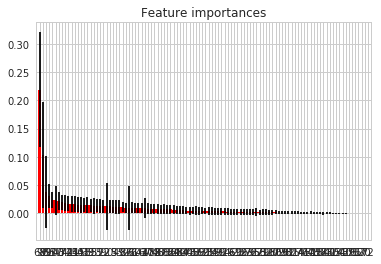

In [33]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train.shape[1]), indices)
plt.xlim([-1, train.shape[1]])
plt.show()

In [34]:
string_columns=test_entrenamiento.columns
string_columns

Index(['mean_time_between_events', 'mean_time_between_co',
       'mean_time_between_ch', 'mean_time_between_vs', 'mean_time_between_ad',
       'mean_time_between_bl', 'mean_time_between_st', 'mean_time_between_se',
       'mean_time_between_sp', 'mean_time_between_vp',
       ...
       'jueves_vs', 'viernes_vs', 'sabado_vs', 'domingo_vs',
       'multiplicacion_time_last_checkout_y_conversion',
       'suma_time_last_checkout_y_conversion',
       'multiplicacion_time_last_checkout_y_viewproduct',
       'suma_time_last_checkout_y_viewproduct',
       'multiplicacion_time_last_checkout_y_searchproduct',
       'suma_time_last_checkout_y_searchproduct'],
      dtype='object', length=104)

In [35]:
#hash del test
#hash
#Transformo texto a numeros
#for f in string_columns:
 #        test_entrenamiento[f] = test_entrenamiento.apply(lambda row:  hash(row[f]) if not(pd.isnull(row[f]))
  #       else np.nan, axis = 1)

In [36]:
test_entrenamiento.head()

,mean_time_between_events,mean_time_between_co,mean_time_between_ch,mean_time_between_vs,mean_time_between_ad,mean_time_between_bl,mean_time_between_st,mean_time_between_se,mean_time_between_sp,mean_time_between_vp,...,jueves_vs,viernes_vs,sabado_vs,domingo_vs,multiplicacion_time_last_checkout_y_conversion,suma_time_last_checkout_y_conversion,multiplicacion_time_last_checkout_y_viewproduct,suma_time_last_checkout_y_viewproduct,multiplicacion_time_last_checkout_y_searchproduct,suma_time_last_checkout_y_searchproduct
0,2.24,-1.00,0.00,0.00,-1.00,-1.00,-1.00,0.00,0.00,2.58,...,0.00,1.00,0.00,0.00,"-1,208,883.00","1,208,882.00","1,460,051,412,027.00","2,416,652.00","1,461,475,476,201.00","2,417,830.00"
1,4.33,-1.00,6.25,5.10,5.60,6.34,-1.00,-1.00,6.18,4.47,...,18.00,16.00,7.00,7.00,"-790,224.00","790,223.00","239,427,599,088.00","1,093,211.00","3,540,908,399,808.00","5,271,116.00"
2,4.53,-1.00,0.00,5.93,0.00,5.33,-1.00,5.93,0.00,4.85,...,0.00,1.00,0.00,1.00,"-361,030.00","361,029.00","130,363,600,640.00","722,118.00","130,391,760,980.00","722,196.00"
3,3.39,-1.00,0.00,4.99,5.16,5.52,4.39,4.91,0.00,3.44,...,6.00,2.00,2.00,0.00,"-1,730,109.00","1,730,108.00","58,285,642,101.00","1,763,798.00","70,894,676,493.00","1,771,086.00"
4,3.13,-1.00,4.70,4.26,4.30,2.74,-1.00,4.25,2.83,3.29,...,0.00,7.00,6.00,4.00,"-1,115,262.00","1,115,261.00","961,356,959,262.00","1,977,263.00","1,341,123,744,978.00","2,317,781.00"


In [37]:
test_entrenamiento=test_entrenamiento.fillna(0)

In [38]:
#predecimos
prediction = forest.predict(test_entrenamiento)

In [39]:
ids = test['person'].values
dataKaggle = pd.DataFrame(ids ,columns={'person'})
dataKaggle.head(5)

,person
0,4886f805
1,0297fc1e
2,2d681dd8
3,cccea85e
4,4c8a8b93


In [40]:
len(prediction)

19415

In [41]:
#Aca agregamos una columna que seria se postulop
dataKaggle['label'] = prediction

In [42]:
 dataKaggle.nlargest(5,'label'  )

,person,label
9012,e10270d8,0.64
4813,7f74a5ec,0.61
4736,cd8b3de2,0.60
4789,592e4498,0.60
4700,bcdfeff5,0.58


In [43]:
dataKaggle.to_csv("predictionRandonForest4.csv", index = False)